In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display

## Data Exploratory

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


None

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


Male      5000
Female    5000
Name: Gender, dtype: int64

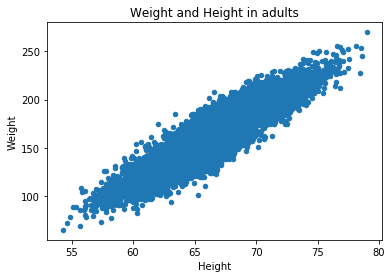

In [2]:
df = pd.read_csv('weight-height.csv')

display(df.info())
display(df.head())
display(df.describe())

display(df['Gender'].value_counts())

df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

## Trainning data

In [3]:
X = df[['Height']].values
y = df['Weight'].values

## Plot a line by hand

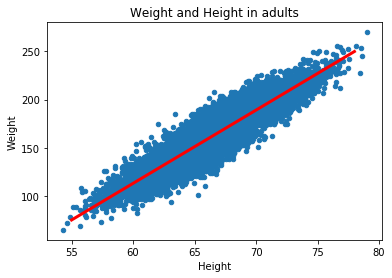

In [4]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

# Here we're plotting the red line 'by hand' with fixed values
# We'll try to learn this line with an algorithm below
plt.plot([55, 78], [75, 250], color='red', linewidth=3)

## Linear Regression model

In [5]:
def line(x, w=0, b=0):
    return x * w + b

In [6]:
def mean_squared_error(y_true, y_pred):
    '''Cost function'''
    s = (y_true - y_pred)**2
    return s.mean()

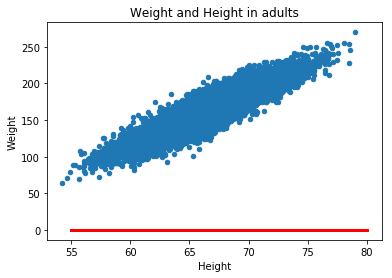

In [7]:
x = np.linspace(55, 80, 100) # 100 points from [55,80]
y_hat = line(x, w=0, b=0)  # y_hat = hypothesis

df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(x, y_hat, color='red', linewidth=3)

## Fit data with w=2, change b

Text(0.5,0,'b')

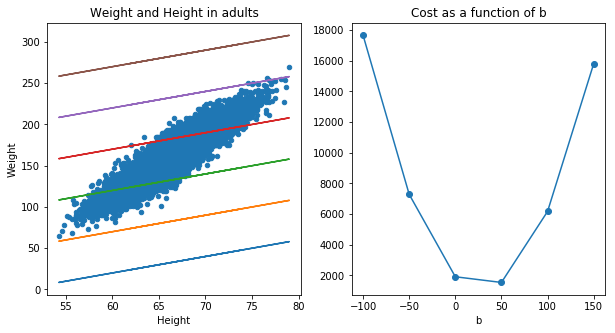

In [8]:
plt.figure(figsize=(10, 5))

# we are going to draw 2 plots in the same figure
# first plot, data and a few lines
ax1 = plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults', ax=ax1)

# let's explore the cost function for a few values of b between -100 and +150
bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = []  # we will append the values of the cost here, for each line
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)

# second plot: Cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')